数据集：Melbourne Airbnb Open Data / listings_summary_dec18.csv（包含16列22895行的2018年12月墨尔本Airbnb短租总体信息与指标的数据列表）

属性：

id: 用于标识房间的号码，一个房间有独一份的id

name: 房东给房间起的名字

host_id: 房东的唯一识别码

host_name: 房东的名字

neighbourhood_group: 地区分组

neighbourhood: 地区

latitude: 纬度

longitude: 经度

room_type: 房型

price: 价格

minimum_nights: 最少住几晚

number_of_reviews: 评论数

last_review: 最新的评论

reviews_per_month: 每月平均评论数

calculated_host_listings_count: 有多少间房

availability_365: 一年有多少天是可用的


In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
%matplotlib inline

Nominal(dataframe)是处理标称属性的函数

处理标称属性，给出每个可能聚会的频数。

In [2]:
def Nominal(df):
    res_dic = {}
    col6 = df.neighbourhood.unique()    #neighbourhood
    col9 = df.room_type.unique()    #room_type
    res_dic["neighbourhood"] = {}
    res_dic["room_type"] = {}
    for entity in col6:
        res_dic["neighbourhood"][entity] = list(df.neighbourhood).count(entity)
    for entity in col9:
        res_dic["room_type"][entity] = list(df.room_type).count(entity)
    return res_dic

Numeric(dataframe)是处理数值属性的函数

处理数值属性，给出5数概括及缺失值的个数

并对数值属性进行数据可视化，使用直方图、盒图等检查数据分布及离群点

In [3]:
def Numeric(df):
    res_dic = {}
    describe = df.describe()
    res_dic["col7"] = {}
    res_dic["col8"] = {}
    res_dic["col10"] = {}
    res_dic["col11"] = {}
    res_dic["col12"] = {}
    res_dic["col14"] = {}
    res_dic["col15"] = {}
    res_dic["col16"] = {}
    print(describe)
    
    res_dic["col7"]["Max"] = describe.latitude[7]
    res_dic["col7"]["Min"] = describe.latitude[3]
    res_dic["col7"]["Mean"] = describe.latitude[1]
    res_dic["col7"]["Mid"] = describe.latitude[5]
    res_dic["col7"]["25"] = describe.latitude[4]
    res_dic["col7"]["75"] = describe.latitude[6]
    res_dic["col7"]["Nan"] = df.latitude.isna().sum()
    
    res_dic["col8"]["Max"] = describe.longitude[7]
    res_dic["col8"]["Min"] = describe.longitude[3]
    res_dic["col8"]["Mean"] = describe.longitude[1]
    res_dic["col8"]["Mid"] = describe.longitude[5]
    res_dic["col8"]["25"] = describe.longitude[4]
    res_dic["col8"]["75"] = describe.longitude[6]
    res_dic["col8"]["Nan"] = df.longitude.isna().sum()

    res_dic["col10"]["Max"] = describe.price[7]
    res_dic["col10"]["Min"] = describe.price[3]
    res_dic["col10"]["Mean"] = describe.price[1]
    res_dic["col10"]["Mid"] = describe.price[5]
    res_dic["col10"]["25"] = describe.price[4]
    res_dic["col10"]["75"] = describe.price[6]
    res_dic["col10"]["Nan"] = df.price.isna().sum()

    res_dic["col11"]["Max"] = describe.minimum_nights[7]
    res_dic["col11"]["Min"] = describe.minimum_nights[3]
    res_dic["col11"]["Mean"] = describe.minimum_nights[1]
    res_dic["col11"]["Mid"] = describe.minimum_nights[5]
    res_dic["col11"]["25"] = describe.minimum_nights[4]
    res_dic["col11"]["75"] = describe.minimum_nights[6]
    res_dic["col11"]["Nan"] = df.minimum_nights.isna().sum()

    res_dic["col12"]["Max"] = describe.number_of_reviews[7]
    res_dic["col12"]["Min"] = describe.number_of_reviews[3]
    res_dic["col12"]["Mean"] = describe.number_of_reviews[1]
    res_dic["col12"]["Mid"] = describe.number_of_reviews[5]
    res_dic["col12"]["25"] = describe.number_of_reviews[4]
    res_dic["col12"]["75"] = describe.number_of_reviews[6]
    res_dic["col12"]["Nan"] = df.number_of_reviews.isna().sum()

    res_dic["col14"]["Max"] = describe.reviews_per_month[7]
    res_dic["col14"]["Min"] = describe.reviews_per_month[3]
    res_dic["col14"]["Mean"] = describe.reviews_per_month[1]
    res_dic["col14"]["Mid"] = describe.reviews_per_month[5]
    res_dic["col14"]["25"] = describe.reviews_per_month[4]
    res_dic["col14"]["75"] = describe.reviews_per_month[6]
    res_dic["col14"]["Nan"] = df.reviews_per_month.isna().sum()

    res_dic["col15"]["Max"] = describe.calculated_host_listings_count[7]
    res_dic["col15"]["Min"] = describe.calculated_host_listings_count[3]
    res_dic["col15"]["Mean"] = describe.calculated_host_listings_count[1]
    res_dic["col15"]["Mid"] = describe.calculated_host_listings_count[5]
    res_dic["col15"]["25"] = describe.calculated_host_listings_count[4]
    res_dic["col15"]["75"] = describe.calculated_host_listings_count[6]
    res_dic["col15"]["Nan"] = df.calculated_host_listings_count.isna().sum()

    res_dic["col16"]["Max"] = describe.availability_365[7]
    res_dic["col16"]["Min"] = describe.availability_365[3]
    res_dic["col16"]["Mean"] = describe.availability_365[1]
    res_dic["col16"]["Mid"] = describe.availability_365[5]
    res_dic["col16"]["25"] = describe.availability_365[4]
    res_dic["col16"]["75"] = describe.availability_365[6]
    res_dic["col16"]["Nan"] = df.availability_365.isna().sum()

    print(res_dic)
    
    
    #hist
    plt.hist(df["latitude"], bins=100)
    plt.xlabel("Interval")
    plt.ylabel("Frequency")
    plt.title("latitude - Frequency distribution histogram")
    plt.show()

    plt.hist(df["longitude"], bins=100)
    plt.xlabel("Interval")
    plt.ylabel("Frequency")
    plt.title("longitude - Frequency distribution histogram")
    plt.show()
    
    plt.hist(df["price"], bins=100)
    plt.xlabel("Interval")
    plt.ylabel("Frequency")
    plt.title("price - Frequency distribution histogram")
    plt.show()
    
    plt.hist(df["minimum_nights"], bins=100)
    plt.xlabel("Interval")
    plt.ylabel("Frequency")
    plt.title("minimum_nights - Frequency distribution histogram")
    plt.show()
    
    plt.hist(df["number_of_reviews"], bins=100)
    plt.xlabel("Interval")
    plt.ylabel("Frequency")
    plt.title("number_of_reviews - Frequency distribution histogram")
    plt.show()
    
    plt.hist(df["reviews_per_month"], bins=100)
    plt.xlabel("Interval")
    plt.ylabel("Frequency")
    plt.title("reviews_per_month - Frequency distribution histogram")
    plt.show()
    
    plt.hist(df["calculated_host_listings_count"], bins=100)
    plt.xlabel("Interval")
    plt.ylabel("Frequency")
    plt.title("calculated_host_listings_count - Frequency distribution histogram")
    plt.show()
    
    plt.hist(df["availability_365"], bins=100)
    plt.xlabel("Interval")
    plt.ylabel("Frequency")
    plt.title("availability_365 - Frequency distribution histogram")
    plt.show()
    
    
    #boxplot
    plt.boxplot(df["latitude"])
    plt.ylabel("latitude")
    plt.show()
    
    plt.boxplot(df["longitude"])
    plt.ylabel("longitude")
    plt.show()
    
    plt.boxplot(df["price"])
    plt.ylabel("price")
    plt.show()
    
    plt.boxplot(df["minimum_nights"])
    plt.ylabel("minimum_nights")
    plt.show()
    
    plt.boxplot(df["number_of_reviews"])
    plt.ylabel("number_of_reviews")
    plt.show()
    
    plt.boxplot(df["reviews_per_month"])
    plt.ylabel("reviews_per_month")
    plt.show()
    
    plt.boxplot(df["calculated_host_listings_count"])
    plt.ylabel("calculated_host_listings_count")
    plt.show()
    
    plt.boxplot(df["availability_365"])
    plt.ylabel("availability_365")
    plt.show()
     

对于数值属性，将缺失部分剔除进行处理:

In [4]:
def drop_nan_process(df):
    df = df.dropna(subset=["latitude"])
    df = df.dropna(subset=["longitude"])
    df = df.dropna(subset=["price"])
    df = df.dropna(subset=["minimum_nights"])
    df = df.dropna(subset=["number_of_reviews"])
    df = df.dropna(subset=["reviews_per_month"])
    df = df.dropna(subset=["calculated_host_listings_count"])
    df = df.dropna(subset=["availability_365"])
    Numeric(df)

用最高频率值来填补缺失值:

In [5]:
def high_feq_process(df):
    Ndf = pd.DataFrame(df, columns=["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"])
    feq_latitude = Ndf["latitude"].value_counts()
    feq_longitude = Ndf["longitude"].value_counts()
    feq_price = Ndf["price"].value_counts()
    feq_minimum_nights = Ndf["minimum_nights"].value_counts()
    feq_number_of_reviews = Ndf["number_of_reviews"].value_counts()
    feq_reviews_per_month = Ndf["reviews_per_month"].value_counts()
    feq_calculated_host_listings_count = Ndf["calculated_host_listings_count"].value_counts()
    feq_availability_365 = Ndf["availability_365"].value_counts()
    fill_value = {
        "latitude": list(dict(feq_latitude))[0],
        "longitude": list(dict(feq_longitude))[0],
        "price": list(dict(feq_price))[0],
        "minimum_nights": list(dict(feq_minimum_nights))[0],
        "number_of_reviews": list(dict(feq_number_of_reviews))[0],
        "reviews_per_month": list(dict(feq_reviews_per_month))[0],
        "calculated_host_listings_count": list(dict(feq_calculated_host_listings_count))[0],
        "availability_365": list(dict(feq_availability_365))[0],
    }
    Ndf = Ndf.fillna(value=fill_value)
    Numeric(Ndf)

通过属性的相关关系来填补缺失值:

In [6]:
def relation_process(df):
    Ndf = pd.DataFrame(df, columns=["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"])
    Ndf.interpolate(method="values")
    Numeric(Ndf)

通过数据对象之间的相似性来填补缺失值:

In [7]:
def similarity_process(df, k_num):
    OriNdf = pd.DataFrame(df, columns=["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"])
    Ndf = pd.DataFrame(df, columns=["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"])
    Ndf = Ndf.dropna(axis=0, how="any")
    clf = KNeighborsRegressor(n_neighbors=k_num, weights="distance")
    clf.fit(np.array(list(Ndf["calculated_host_listings_count"])).reshape(-1, 1), np.array(list(Ndf["reviews_per_month"])).reshape(-1, 1))
    for i in range(0, len(OriNdf)):
        if pd.isna(OriNdf.iloc[i]["reviews_per_month"]):
            new_value = clf.predict(np.array([OriNdf.iloc[i]["calculated_host_listings_count"]]).reshape(-1, 1))
            OriNdf.at[i, "reviews_per_month"] = new_value
    Numeric(OriNdf)

开始进行分析：

In [8]:
file = "melbourne-airbnb-open-data/listings_summary_dec18.csv"
df = pd.read_csv(file)
Nominal(df)

{'neighbourhood': {'Manningham': 313,
  'Moreland': 967,
  'Port Phillip': 2808,
  'Darebin': 698,
  'Casey': 153,
  'Melbourne': 7368,
  'Monash': 571,
  'Frankston': 177,
  'Yarra': 2049,
  'Bayside': 375,
  'Boroondara': 664,
  'Kingston': 309,
  'Stonnington': 1621,
  'Glen Eira': 631,
  'Maroondah': 115,
  'Maribyrnong': 436,
  'Yarra Ranges': 771,
  'Banyule': 203,
  'Whitehorse': 614,
  'Melton': 95,
  'Brimbank': 108,
  'Hobsons Bay': 239,
  'Wyndham': 426,
  'Moonee Valley': 344,
  'Whittlesea': 137,
  'Greater Dandenong': 147,
  'Nillumbik': 88,
  'Knox': 175,
  'Cardinia': 123,
  'Hume': 170},
 'room_type': {'Private room': 8116,
  'Entire home/apt': 14379,
  'Shared room': 400}}

           latitude     longitude         price  minimum_nights  \
count  22895.000000  22895.000000  22895.000000    22895.000000   
mean     -37.826827    145.008457    148.004368        4.059314   
std        0.066747      0.127711    210.883253       25.883257   
min      -38.224427    144.484326      0.000000        1.000000   
25%      -37.852665    144.957692     71.000000        1.000000   
50%      -37.817855    144.978402    111.000000        2.000000   
75%      -37.803176    145.013441    165.000000        3.000000   
max      -37.482595    145.839127  12624.000000     1125.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       22895.000000       17653.000000                    22895.000000   
mean           21.266477           1.590542                        7.125792   
std            39.013606           1.724118                       15.637804   
min             0.000000           0.010000                        1.000000   
2

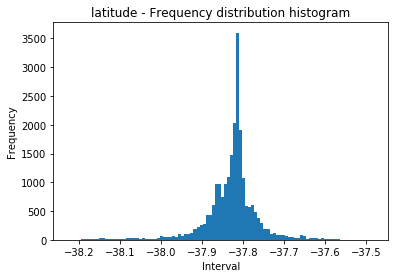

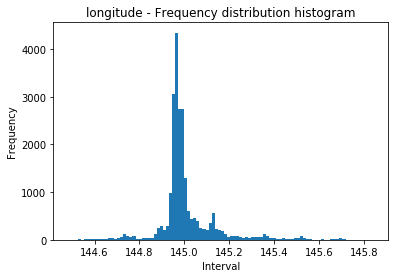

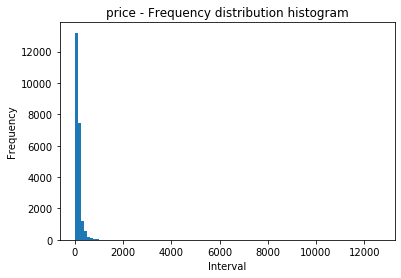

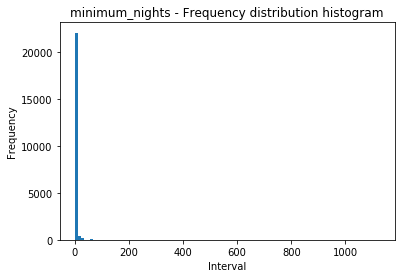

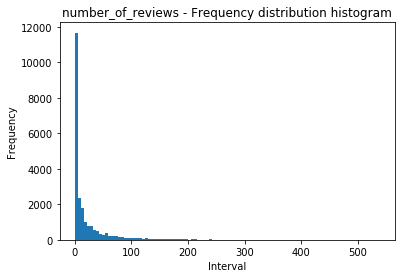

/Library/conda/anaconda3/envs/deeplearning/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/conda/anaconda3/envs/deeplearning/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


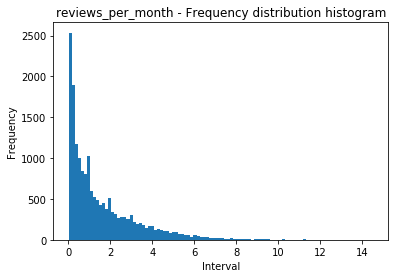

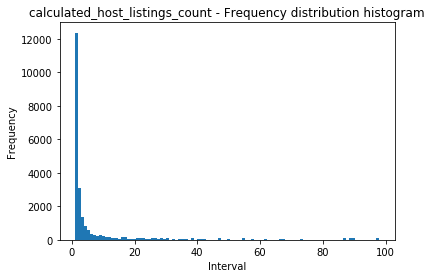

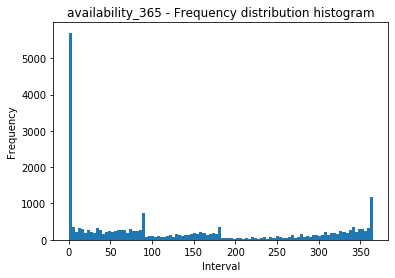

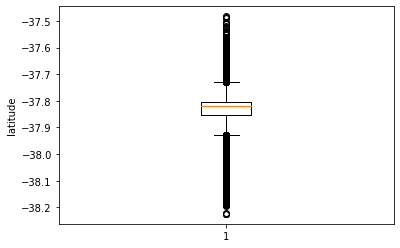

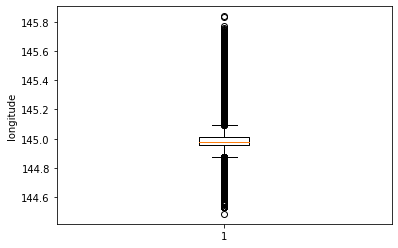

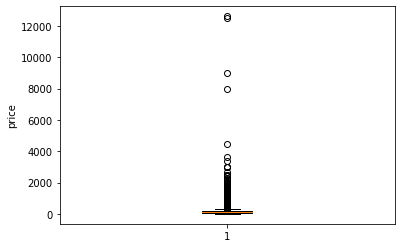

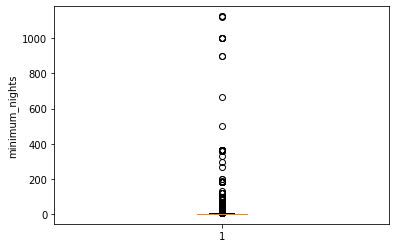

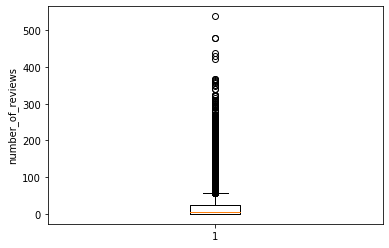

/Library/conda/anaconda3/envs/deeplearning/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/Library/conda/anaconda3/envs/deeplearning/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/Library/conda/anaconda3/envs/deeplearning/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/Library/conda/anaconda3/envs/deeplearning/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


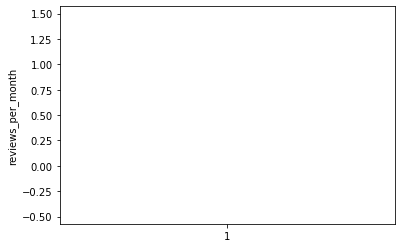

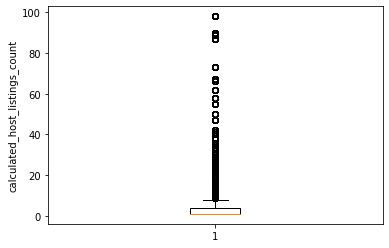

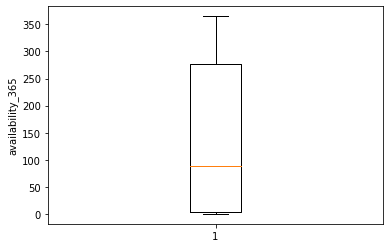

In [9]:
Numeric(pd.DataFrame(df, columns=["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]))

通过对数值属性进行数据可视化分析，可以得出以下结论，latitude与longitude属性符合正态分布且离群点少，因为这些短租统计都来自于墨尔本地区；

price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count以及availability_365属性明显不符合正态分布，其中price的分布显示出当地的整体房价较为平均，number_of_reviews与reviews_per_month的分布显示出评论较多的短租较少（可能是大部分租客都对少部分的优质短租表现出兴趣），calculated_host_listings_count的分布显示出当地大部分的短租都是以单间的形式进行出租。

通过对缺失值的统计,可发现reviews_per_mont的缺失值较多,但number_of_reviews无缺失值，则可能在对月均评论进行统计时出现了问题。

           latitude     longitude         price  minimum_nights  \
count  17653.000000  17653.000000  17653.000000    17653.000000   
mean     -37.825577    145.008918    141.191242        3.351385   
std        0.065469      0.129482    190.121233       22.238328   
min      -38.224427    144.531993      0.000000        1.000000   
25%      -37.849602    144.957241     71.000000        1.000000   
50%      -37.816764    144.977243    114.000000        2.000000   
75%      -37.803164    145.008152    161.000000        3.000000   
max      -37.486284    145.831408  12624.000000     1125.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       17653.000000       17653.000000                    17653.000000   
mean           27.579562           1.590542                        7.356200   
std            42.426111           1.724118                       15.769416   
min             1.000000           0.010000                        1.000000   
2

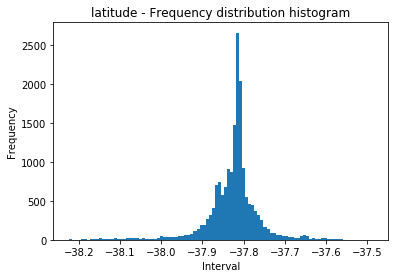

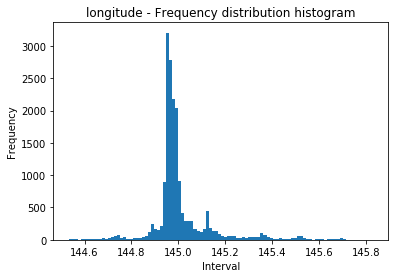

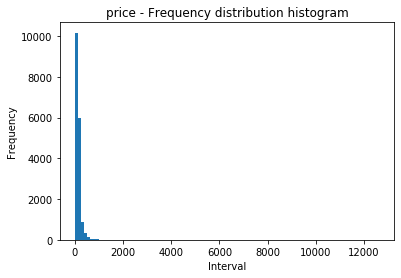

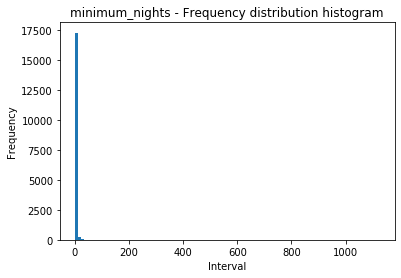

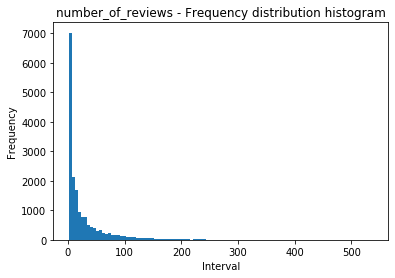

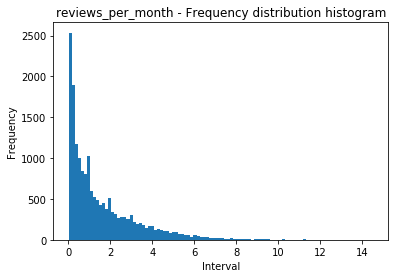

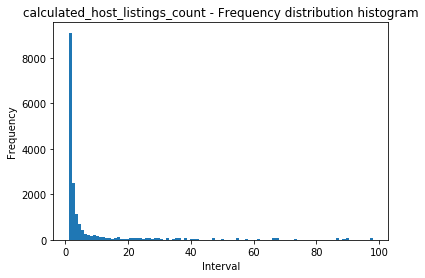

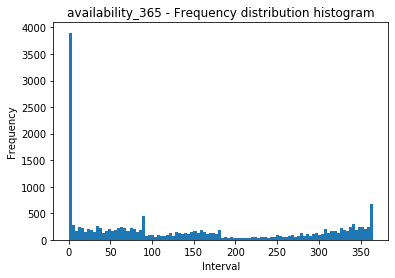

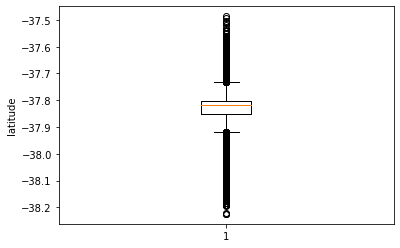

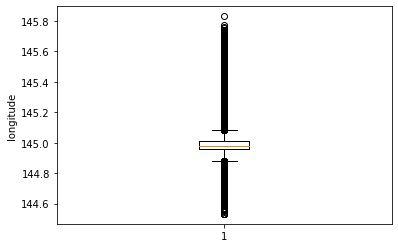

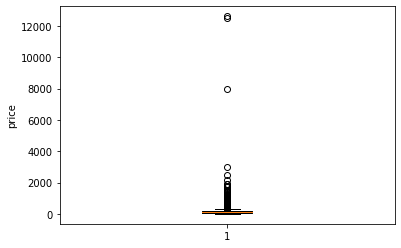

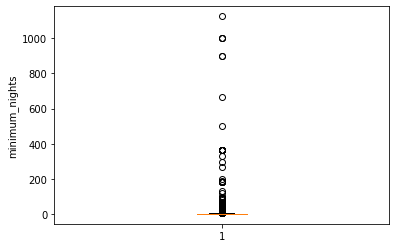

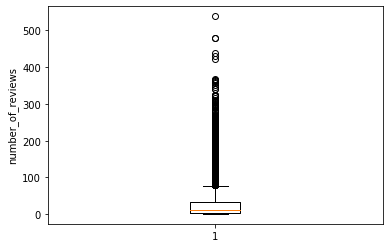

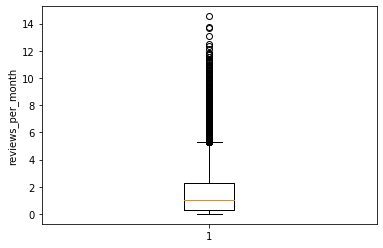

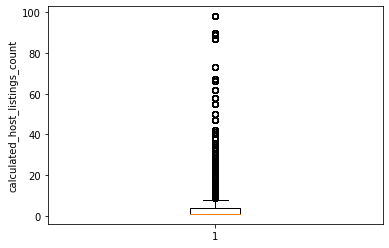

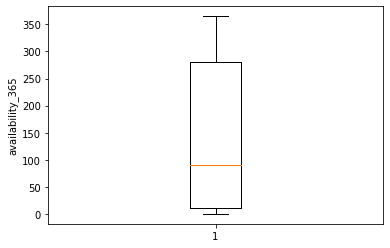

In [10]:
drop_nan_process(pd.DataFrame(df, columns=["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]))

           latitude     longitude         price  minimum_nights  \
count  22895.000000  22895.000000  22895.000000    22895.000000   
mean     -37.826827    145.008457    148.004368        4.059314   
std        0.066747      0.127711    210.883253       25.883257   
min      -38.224427    144.484326      0.000000        1.000000   
25%      -37.852665    144.957692     71.000000        1.000000   
50%      -37.817855    144.978402    111.000000        2.000000   
75%      -37.803176    145.013441    165.000000        3.000000   
max      -37.482595    145.839127  12624.000000     1125.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       22895.000000       22895.000000                    22895.000000   
mean           21.266477           1.455332                        7.125792   
std            39.013606           1.534120                       15.637804   
min             0.000000           0.010000                        1.000000   
2

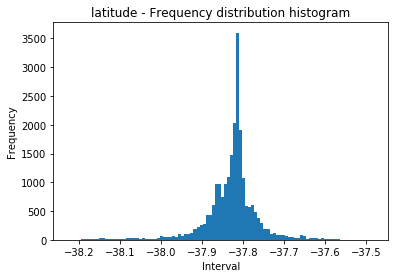

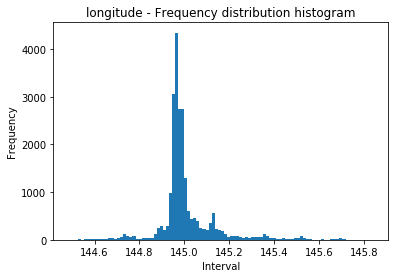

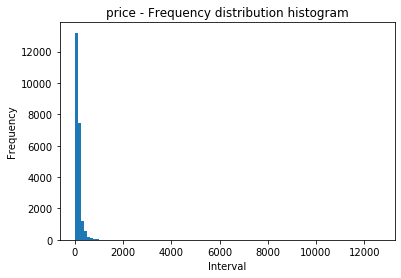

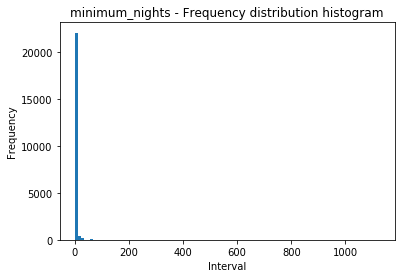

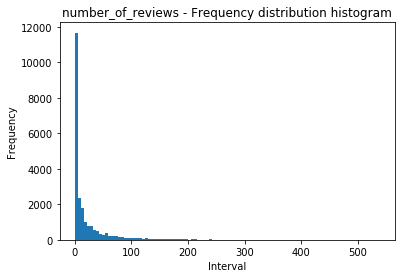

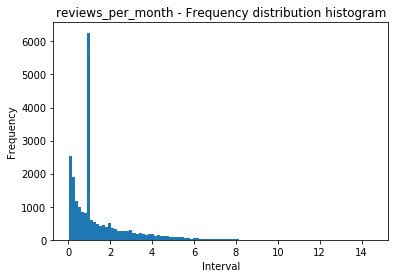

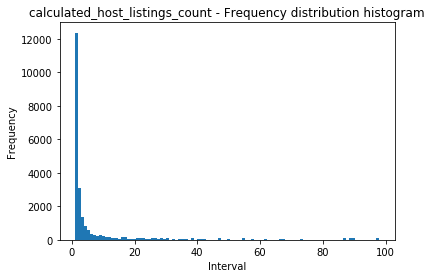

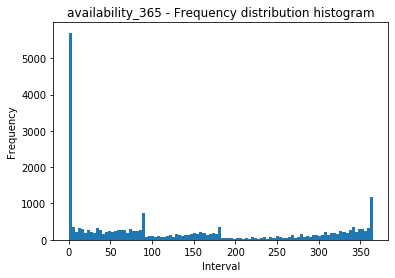

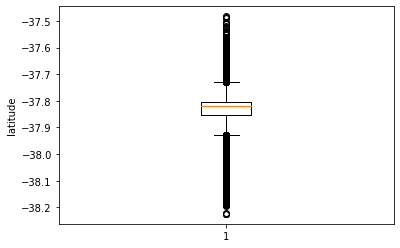

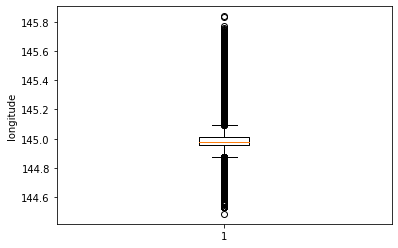

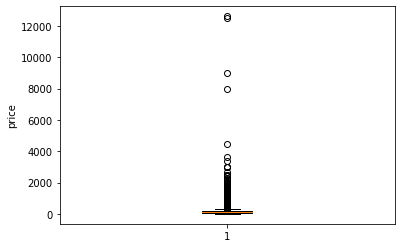

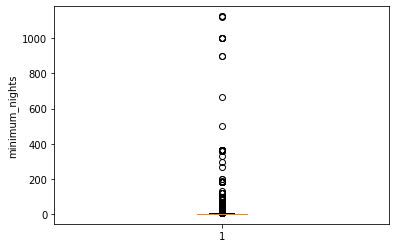

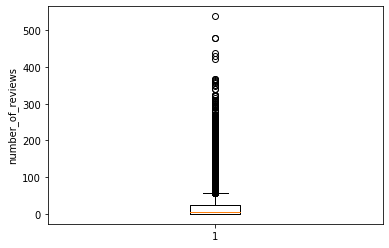

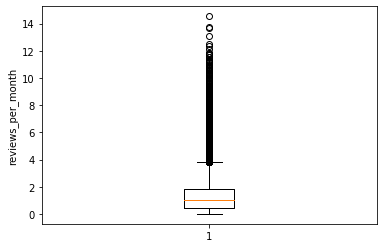

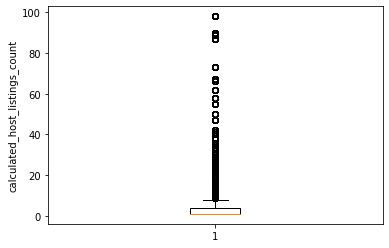

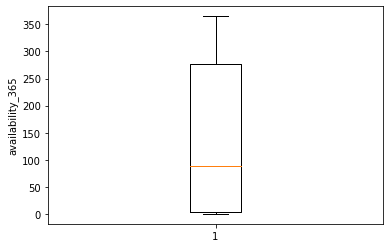

In [11]:
high_feq_process(pd.DataFrame(df, columns=["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]))

           latitude     longitude         price  minimum_nights  \
count  22895.000000  22895.000000  22895.000000    22895.000000   
mean     -37.826827    145.008457    148.004368        4.059314   
std        0.066747      0.127711    210.883253       25.883257   
min      -38.224427    144.484326      0.000000        1.000000   
25%      -37.852665    144.957692     71.000000        1.000000   
50%      -37.817855    144.978402    111.000000        2.000000   
75%      -37.803176    145.013441    165.000000        3.000000   
max      -37.482595    145.839127  12624.000000     1125.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       22895.000000       17653.000000                    22895.000000   
mean           21.266477           1.590542                        7.125792   
std            39.013606           1.724118                       15.637804   
min             0.000000           0.010000                        1.000000   
2

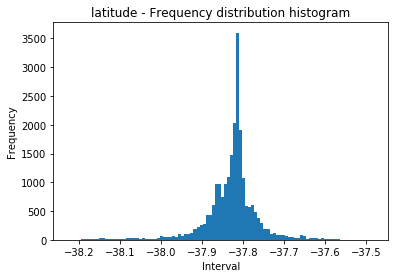

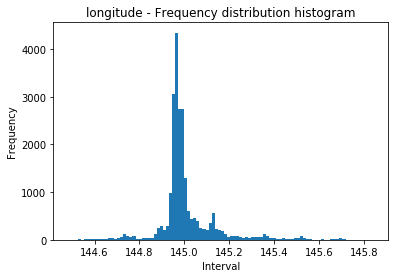

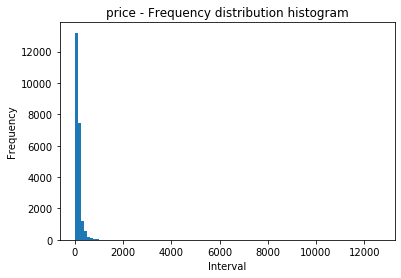

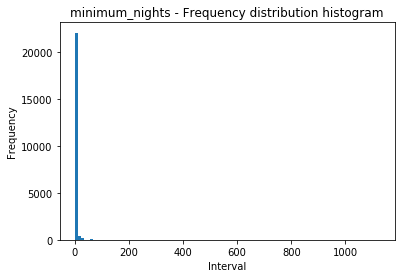

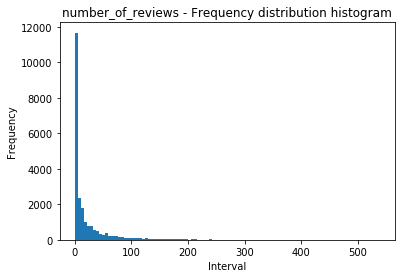

/Library/conda/anaconda3/envs/deeplearning/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/conda/anaconda3/envs/deeplearning/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


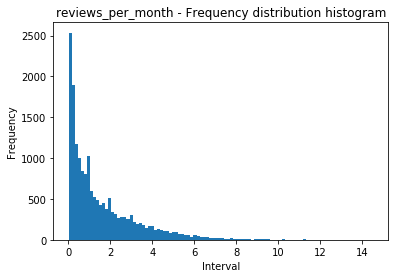

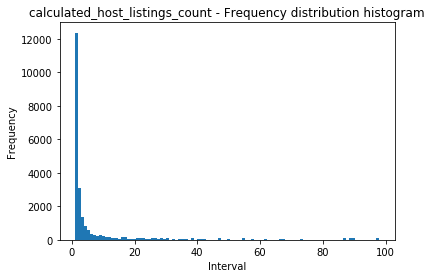

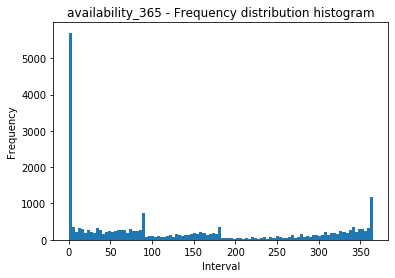

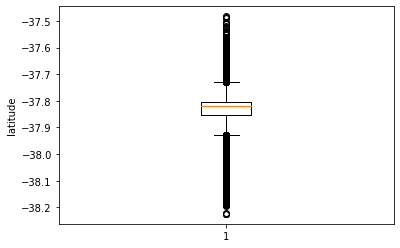

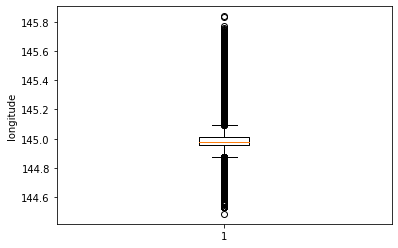

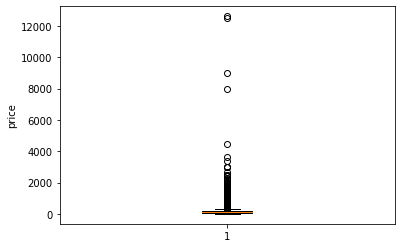

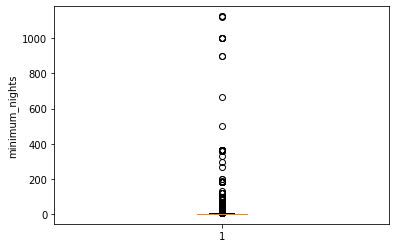

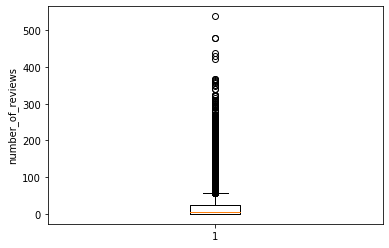

/Library/conda/anaconda3/envs/deeplearning/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/Library/conda/anaconda3/envs/deeplearning/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/Library/conda/anaconda3/envs/deeplearning/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/Library/conda/anaconda3/envs/deeplearning/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


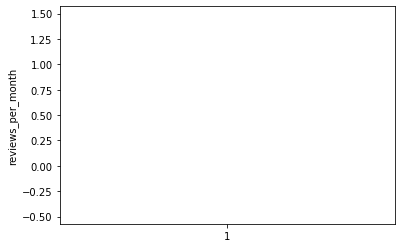

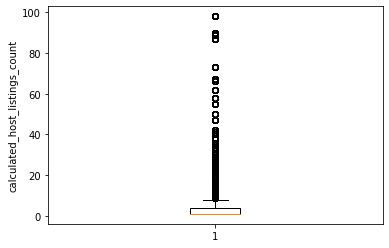

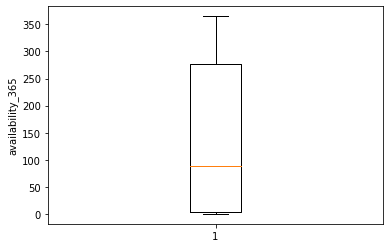

In [12]:
relation_process(pd.DataFrame(df, columns=["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]))

           latitude     longitude         price  minimum_nights  \
count  22895.000000  22895.000000  22895.000000    22895.000000   
mean     -37.826827    145.008457    148.004368        4.059314   
std        0.066747      0.127711    210.883253       25.883257   
min      -38.224427    144.484326      0.000000        1.000000   
25%      -37.852665    144.957692     71.000000        1.000000   
50%      -37.817855    144.978402    111.000000        2.000000   
75%      -37.803176    145.013441    165.000000        3.000000   
max      -37.482595    145.839127  12624.000000     1125.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       22895.000000       22895.000000                    22895.000000   
mean           21.266477           1.534717                        7.125792   
std            39.013606           1.544901                       15.637804   
min             0.000000           0.010000                        1.000000   
2

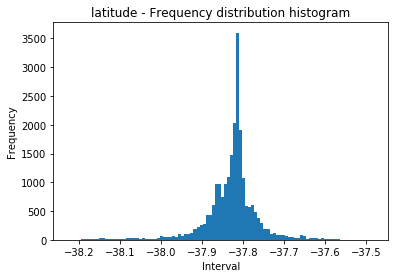

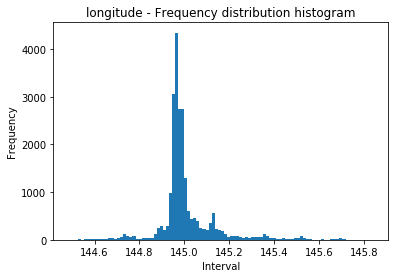

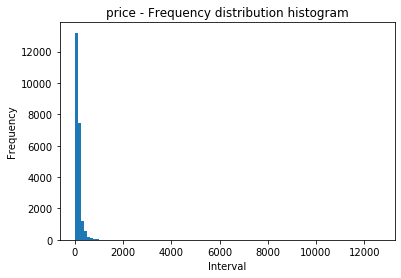

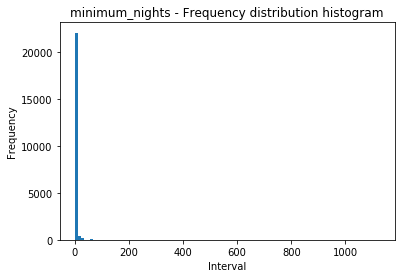

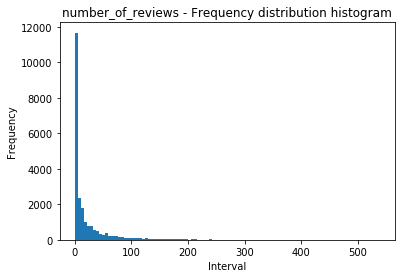

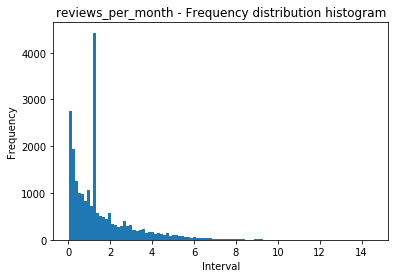

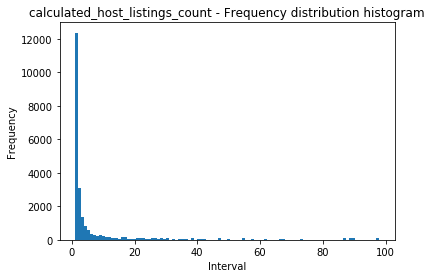

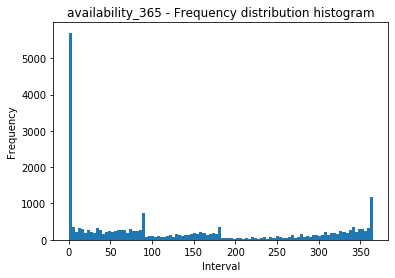

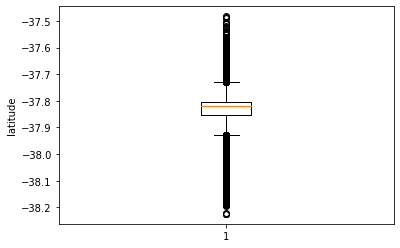

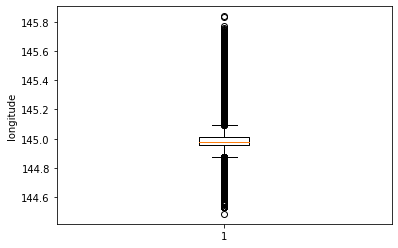

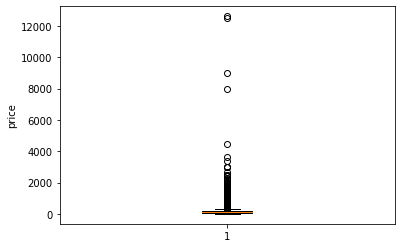

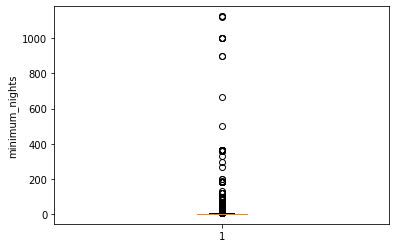

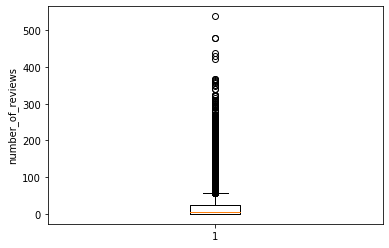

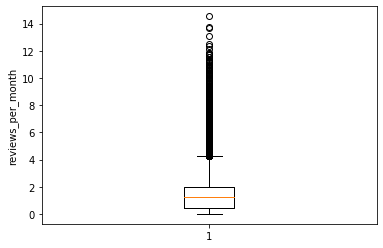

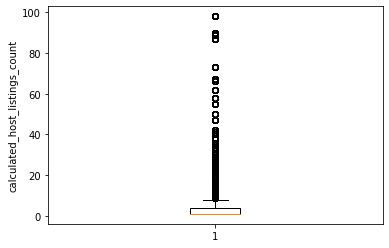

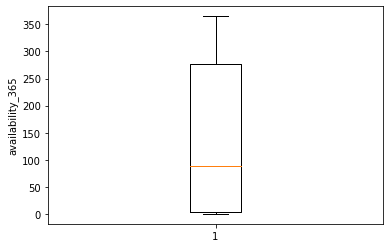

In [13]:
similarity_process(pd.DataFrame(df, columns=["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]), k_num=3)

通过4种策略对缺失值进行处理，并将新旧数据集可视化对比后，发现“将缺失部分剔除”处理后的数据集相较于另外三种策略更合适一些（无高频异常点）。